In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [35]:
data = pd.read_csv('healthcare-dataset.csv')
data.head().T

,0,1,2,3,4
id,9046,51676,31112,60182,1665
gender,Male,Female,Male,Female,Female
age,67.0,61.0,80.0,49.0,79.0
hypertension,0,0,0,0,1
heart_disease,1,0,1,0,0
ever_married,Yes,Yes,Yes,Yes,Yes
work_type,Private,Self-employed,Private,Private,Self-employed
Residence_type,Urban,Rural,Rural,Urban,Rural
avg_glucose_level,228.69,202.21,105.92,171.23,174.12
bmi,36.6,NaN,32.5,34.4,24.0


In [36]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [37]:
data.drop(columns=['id'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [38]:
data.fillna(method="ffill")

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,36.6,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,18.6,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [40]:
data.fillna(0)  # replaces all NaN values with 0

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,0.0,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,0.0,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [41]:
# create a function to view pie charts
def piedist(data, column, labels):
    """
    Plots the distribution percentage of a categorical column
    in a pie chart.
    """
    dist = data[column].value_counts()
    colors = ['#66b3ff', '#99ff99', '#ff9999', '#ffcc99', '#be99ff']
    plt.pie(x=dist, labels=labels, autopct='%1.2f%%', pctdistance=0.5, colors=colors)
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    

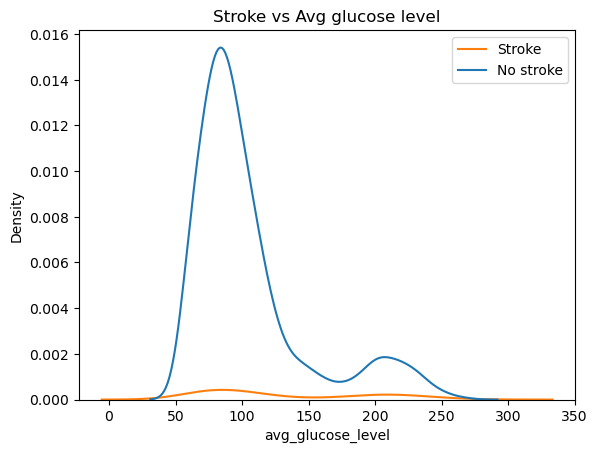

In [42]:
sns.kdeplot(data=data, x='avg_glucose_level', hue='stroke')
plt.title('Stroke vs Avg glucose level')
plt.legend(['Stroke', 'No stroke'])

<AxesSubplot:xlabel='age'>

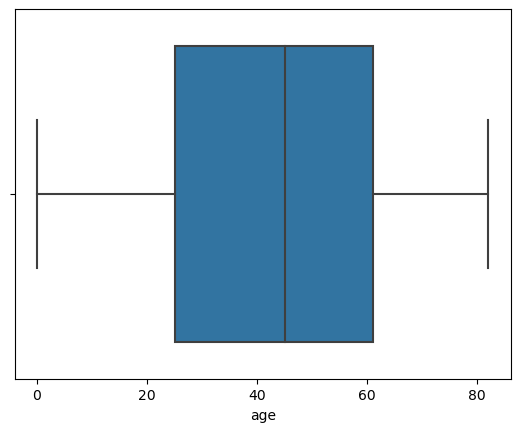

In [43]:
sns.boxplot(x=data['age'])

<AxesSubplot:title={'center':'Distribution of smoking_status'}, xlabel='smoking_status', ylabel='count'>

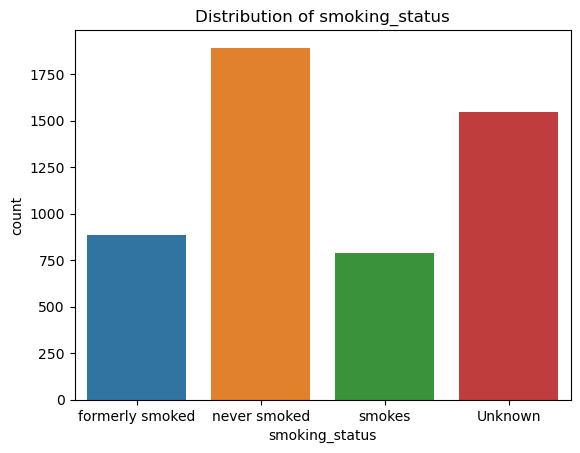

In [44]:
plt.title('Distribution of smoking_status')
sns.countplot(x=data['smoking_status'])

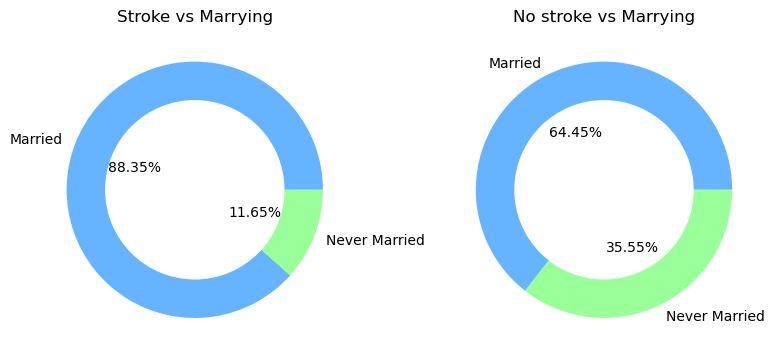

In [45]:
fig = plt.figure(figsize=(8, 5))

ax = plt.subplot2grid((1, 2), (0, 0))
plt.title('Stroke vs Marrying')
piedist(data=data[data['stroke'] == 1], column='ever_married', labels=['Married', 'Never Married'])

ax = plt.subplot2grid((1, 2), (0, 1))
plt.title('No stroke vs Marrying')
piedist(data=data[data['stroke'] == 0], column='ever_married', labels=['Married', 'Never Married'])

plt.tight_layout()

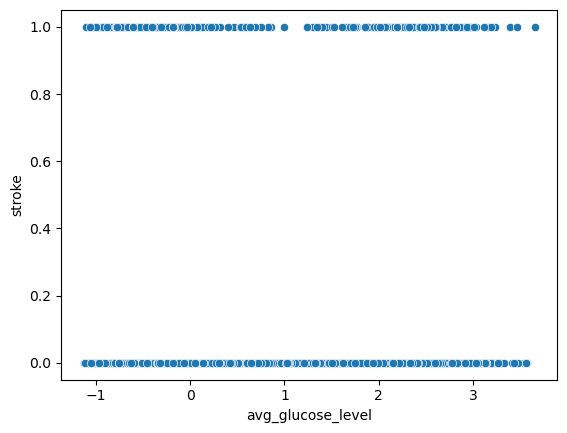

In [69]:
sns.scatterplot(data=data, x='avg_glucose_level', y='stroke')
plt.show()

In [48]:
data = data.join(pd.get_dummies(data['gender']))
data.drop(columns=['gender'], inplace=True)
data.rename(columns={'Female': 'female', 'Male': 'male'}, inplace=True)

data = data.join(pd.get_dummies(data['work_type']))
data.drop(columns=['work_type'], inplace=True)
data.rename(columns={
    'Private': 'private_work',
    'Self-employed': 'self_employed',
    'Govt_job': 'government_work',
    'children': 'children_work',
    'Never_worked': 'never_worked'
}, inplace=True)

data = data.join(pd.get_dummies(data['Residence_type']))
data.drop(columns=['Residence_type'], inplace=True)
data.rename(columns={'Urban': 'urban_resident',
          'Rural': 'rural_resident'}, inplace=True)

data = data.join(pd.get_dummies(data['smoking_status']))
data.drop(columns=['smoking_status'], inplace=True)
data.rename(columns={
    'formerly smoked': 'formerly_smoked',
    'never smoked': 'never_smoked',
    'Unknown': 'smoking_unknown'
}, inplace=True)

data.head().T

,0,1,2,3,4
age,67.0,61.0,80.0,49.0,79.0
hypertension,0,0,0,0,1
heart_disease,1,0,1,0,0
ever_married,Yes,Yes,Yes,Yes,Yes
avg_glucose_level,228.69,202.21,105.92,171.23,174.12
bmi,36.6,28.1,32.5,34.4,24.0
stroke,1,1,1,1,1
female,0,1,0,1,1
male,1,0,1,0,0
Other,0,0,0,0,0


In [49]:
# Replace null in BMI with the median
data['bmi'].fillna(data['bmi'].median(), inplace=True)

In [50]:
data.head().T

,0,1,2,3,4
age,67.0,61.0,80.0,49.0,79.0
hypertension,0,0,0,0,1
heart_disease,1,0,1,0,0
ever_married,Yes,Yes,Yes,Yes,Yes
avg_glucose_level,228.69,202.21,105.92,171.23,174.12
bmi,36.6,28.1,32.5,34.4,24.0
stroke,1,1,1,1,1
female,0,1,0,1,1
male,1,0,1,0,0
Other,0,0,0,0,0


In [51]:
scaler = StandardScaler()
continuous_columns = ['avg_glucose_level', 'bmi', 'age']
data[continuous_columns] = scaler.fit_transform(data[continuous_columns])  #scale fit the values

# Should have a mean of ~0 and std of ~1
data[continuous_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
avg_glucose_level,5110.0,1.012345e-16,1.000098,-1.126958,-0.638322,-0.314995,0.175408,3.657145
bmi,5110.0,1.021579e-16,1.000098,-2.411027,-0.657509,-0.098981,0.511503,8.928390
age,5110.0,-6.813233e-16,1.000098,-1.908261,-0.806115,0.078432,0.786070,1.714845


In [52]:
data.head().T

,0,1,2,3,4
age,1.051434,0.78607,1.62639,0.255342,1.582163
hypertension,0,0,0,0,1
heart_disease,1,0,1,0,0
ever_married,Yes,Yes,Yes,Yes,Yes
avg_glucose_level,2.706375,2.121559,-0.005028,1.437358,1.501184
bmi,1.005086,-0.098981,0.472536,0.719327,-0.631531
stroke,1,1,1,1,1
female,0,1,0,1,1
male,1,0,1,0,0
Other,0,0,0,0,0


In [53]:
data['ever_married'].replace(['Yes', 'No'], [1, 0], inplace=True)
data['ever_married'].dtype

dtype('int64')

In [54]:
data.head().T

,0,1,2,3,4
age,1.051434,0.786070,1.626390,0.255342,1.582163
hypertension,0.000000,0.000000,0.000000,0.000000,1.000000
heart_disease,1.000000,0.000000,1.000000,0.000000,0.000000
ever_married,1.000000,1.000000,1.000000,1.000000,1.000000
avg_glucose_level,2.706375,2.121559,-0.005028,1.437358,1.501184
bmi,1.005086,-0.098981,0.472536,0.719327,-0.631531
stroke,1.000000,1.000000,1.000000,1.000000,1.000000
female,0.000000,1.000000,0.000000,1.000000,1.000000
male,1.000000,0.000000,1.000000,0.000000,0.000000
Other,0.000000,0.000000,0.000000,0.000000,0.000000


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                5110 non-null   float64
 1   hypertension       5110 non-null   int64  
 2   heart_disease      5110 non-null   int64  
 3   ever_married       5110 non-null   int64  
 4   avg_glucose_level  5110 non-null   float64
 5   bmi                5110 non-null   float64
 6   stroke             5110 non-null   int64  
 7   female             5110 non-null   uint8  
 8   male               5110 non-null   uint8  
 9   Other              5110 non-null   uint8  
 10  government_work    5110 non-null   uint8  
 11  never_worked       5110 non-null   uint8  
 12  private_work       5110 non-null   uint8  
 13  self_employed      5110 non-null   uint8  
 14  children_work      5110 non-null   uint8  
 15  rural_resident     5110 non-null   uint8  
 16  urban_resident     5110 

In [56]:
X = data.drop(columns=['stroke'])
y = data['stroke']

In [57]:
all_categorical_features = [
    'hypertension',
    'heart_disease',
    'ever_married',
    'female',
    'male',
    'government_work',
    'never_worked',
    'private_work',
    'self_employed',
    'children_work',
    'rural_resident',
    'urban_resident',
    'smoking_unknown',
    'formerly_smoked',
    'never_smoked',
    'smokes'
]

In [58]:
smotedata = SMOTENC(categorical_features=[feature in all_categorical_features for feature in X.columns])
X_resampled, y_resampled = smotedata.fit_resample(X, y)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=10)

In [62]:
# Keeps track of models and their scores
model_names = []
model_scores = []

In [63]:
def confusion_matrix_plot(matrix, model_name):
  
  #Plots the confusion matrix of a model as a heatmap.
  _, ax = plt.subplots(figsize=(5, 3))
  plt.title(f'{model_name} Confusion Matrix')
  sns.heatmap(matrix, annot=True, fmt='d', cmap='Greens')
  ax.set_xticklabels(['Postitive', 'Negative'])
  ax.set_yticklabels(['Postitive', 'Negative'])
  ax.set_ylabel('Predicted Values')
  ax.set_xlabel('Actual Values')
  ax.xaxis.tick_top()
  ax.xaxis.set_label_position('top')

In [64]:
#===============================================================================================================================
#logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=10)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=10)

In [65]:
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1475
           1       0.81      0.85      0.83      1442

    accuracy                           0.82      2917
   macro avg       0.82      0.82      0.82      2917
weighted avg       0.82      0.82      0.82      2917



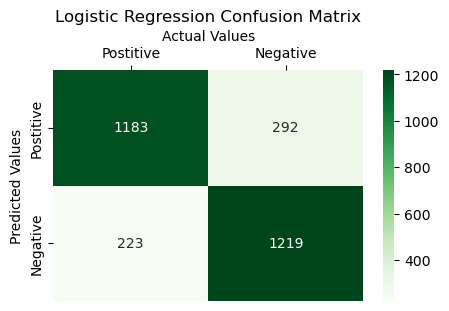

In [66]:
confusion_matrix_plot(confusion_matrix(y_test, lr.predict(X_test)), 'Logistic Regression')

In [67]:
model_names.append('Logistic Regression')
model_scores.append(roc_auc_score(y_test, lr.predict(X_test)))

In [68]:
model_and_score = pd.DataFrame()
model_and_score['name'] = model_names
model_and_score['score'] = model_scores
model_and_score.style.background_gradient(cmap=sns.light_palette('green', as_cmap=True))

,name,score
0,Logistic Regression,0.823694
